In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Applications of Deep Learning (WUSTL, Fall 2023)

Computer vision: is the model wearing glasses or not?


In [2]:
import numpy as np 
import pandas as pd

df=pd.read_csv("/kaggle/input/applications-of-deep-learning-wustl-fall-2023/train.csv")
test=pd.read_csv("/kaggle/input/applications-of-deep-learning-wustl-fall-2023/test.csv")
df.head()

,id,file,glasses
0,1,1.jpg,0
1,2,2.jpg,0
2,3,3.jpg,1
3,4,4.jpg,0
4,5,5.jpg,1


In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
img_path="/kaggle/input/applications-of-deep-learning-wustl-fall-2023/"
img=cv2.imread(img_path+str(df["file"][0]))
img.shape

(512, 512, 3)

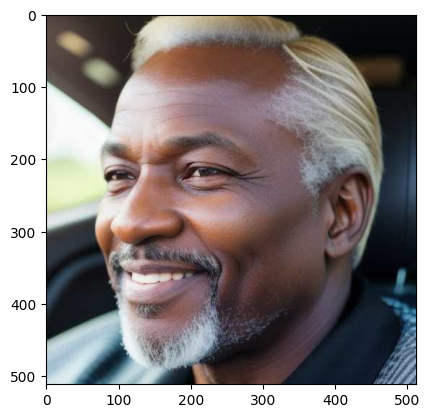

In [5]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
size=128
x=[]
for img in df["file"]:
    img=cv2.imread(img_path+str(img))
    img=cv2.resize(img, (size,size))
    img=img/255.0 
    x.append(img)

In [7]:
x=np.array(x)
y=df["glasses"]
len(x), y.shape

(24999, (24999,))

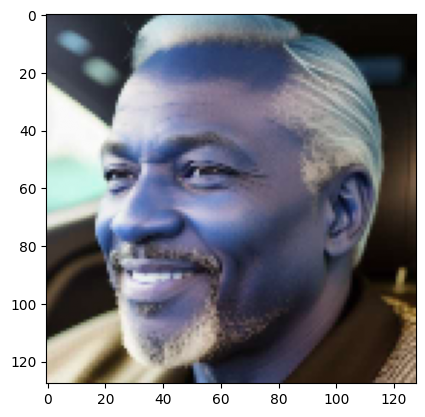

In [8]:
plt.imshow(x[0])

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization

2024-05-27 15:43:47.967540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 15:43:47.967632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 15:43:48.090965: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
x=1 #RAM çok fazla dolunca boşaltalım biraz

In [13]:
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
  10/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.5386 - loss: 1.4744

I0000 00:00:1716824674.075317     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716824674.096911     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5141 - loss: 0.7471

W0000 00:00:1716824693.903702     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5141 - loss: 0.7471 - val_accuracy: 0.5078 - val_loss: 0.6925
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5722 - loss: 0.6558 - val_accuracy: 0.9402 - val_loss: 0.3088
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9427 - loss: 0.2707 - val_accuracy: 0.9552 - val_loss: 0.1878
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9756 - loss: 0.1379 - val_accuracy: 0.7858 - val_loss: 0.4824
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9810 - loss: 0.0937 - val_accuracy: 0.9652 - val_loss: 0.1131
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9874 - loss: 0.0534 - val_accuracy: 0.9824 - val_loss: 0.0706
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9020 - val_loss: 0.4022
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9880 - loss: 0.03

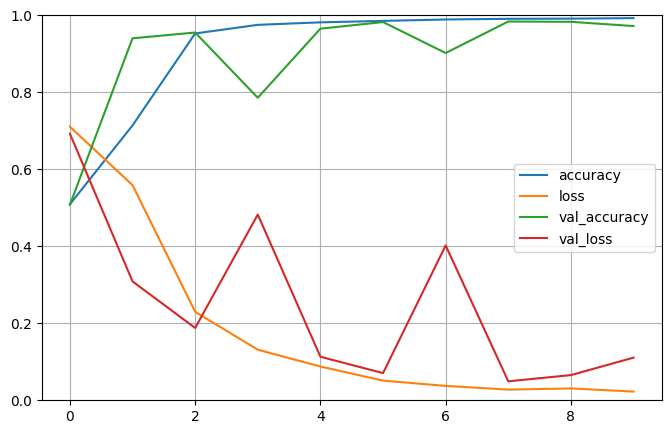

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9726 - loss: 0.1093
0.1107696145772934 0.972000002861023


In [16]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [22]:
tahmin=model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
confusion_matrix(y_test, np.round(tahmin).astype(int))

array([[2453,   14],
       [ 126, 2407]])

In [24]:
print(classification_report(y_test, np.round(tahmin).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2467
           1       0.99      0.95      0.97      2533

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [25]:
test.head()

,id,file
0,25000,25000.jpg
1,25001,25001.jpg
2,25002,25002.jpg
3,25003,25003.jpg
4,25004,25004.jpg


In [26]:
x=[]
for img in test["file"]:
    img=cv2.imread(img_path+str(img))
    img=cv2.resize(img, (size,size))
    img=img/255.0 
    x.append(img)

In [27]:
x=np.array(x)

In [28]:
pred=model.predict(x)

215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [29]:
pred

array([[9.9999690e-01],
       [2.1756205e-10],
       [1.4153817e-05],
       ...,
       [5.3817066e-06],
       [1.5700101e-05],
       [1.0000000e+00]], dtype=float32)

In [30]:
np.round(pred).astype(int)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

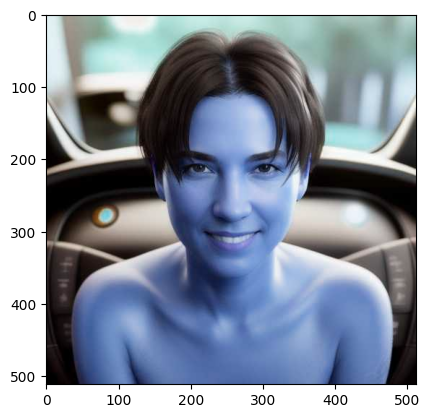

In [31]:
img=cv2.imread(img_path+str(test["file"][2]))
plt.imshow(img)

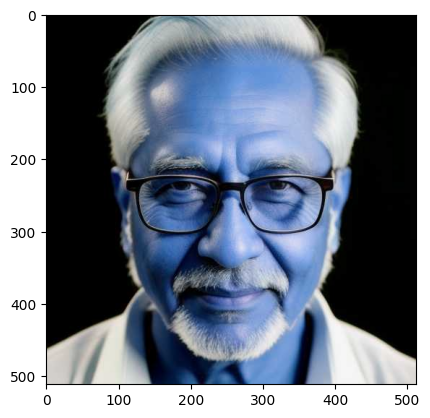

In [32]:
img=cv2.imread(img_path+str(test["file"][3]))
plt.imshow(img)

In [33]:
test["glasses"]=np.round(pred).astype(int)
test.head()

,id,file,glasses
0,25000,25000.jpg,1
1,25001,25001.jpg,0
2,25002,25002.jpg,0
3,25003,25003.jpg,1
4,25004,25004.jpg,1


In [34]:
test[["id", "glasses"]].to_csv("submission.csv", index=False)

In [36]:
model.save("glass_model.h5")

## Sonuç

Kaggle yarışmalarından biri olan bu projede modelin gözlük takıp takmadığını tahmin eden derin öğrenme modeli geliştirilmiş ve eğitim verileri üzerinde %97 üzerinde başarı elde edilmiştir.